Super simple linprog template so I can apply it in python.

In [1]:
from scipy.optimize import linprog

# Coefficients of the objective function (note: linprog does minimization, so we negate for maximization)
c = [-20, -30]  # Maximize 20x + 30y → Minimize -20x -30y

# Coefficients of inequality constraints (Ax ≤ b)
A = [
    [2, 4],   # 2x + 4y <= 100 (wood)
    [1, 2]    # x + 2y <= 40 (labor)
]
b = [100, 40]

# Bounds for x and y (both must be ≥ 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve using linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Print results
if res.success:
    print(f"Optimal number of chairs (x): {res.x[0]:.2f}")
    print(f"Optimal number of tables (y): {res.x[1]:.2f}")
    print(f"Maximum Profit: ${-res.fun:.2f}")
else:
    print("No solution found:", res.message)


Optimal number of chairs (x): 40.00
Optimal number of tables (y): 0.00
Maximum Profit: $800.00


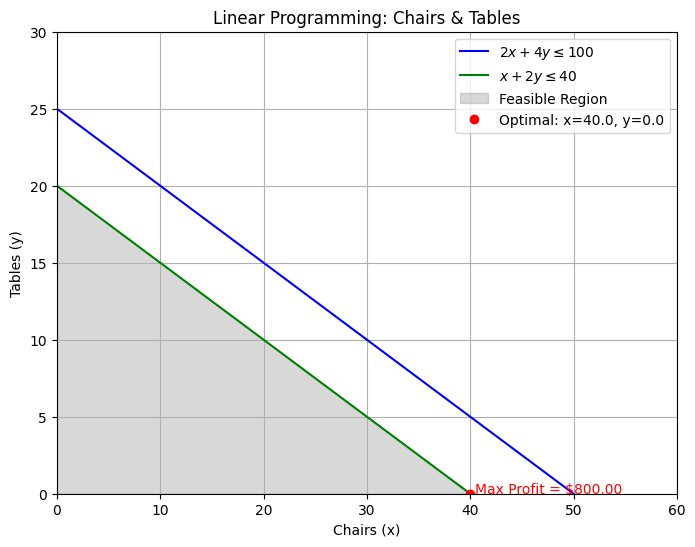

In [3]:
# This version with visuals

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the constraints:
# 1. 2x + 4y <= 100  → y <= (100 - 2x)/4
# 2. x + 2y <= 40    → y <= (40 - x)/2
# 3. x >= 0
# 4. y >= 0

x = np.linspace(0, 60, 400)
y1 = (100 - 2*x)/4
y2 = (40 - x)/2

# Feasible region: compute min of constraints
y1 = np.minimum(y1, 60)
y2 = np.minimum(y2, 60)

# Plotting
plt.figure(figsize=(8, 6))

# Constraint lines
plt.plot(x, y1, label=r'$2x + 4y \leq 100$', color='blue')
plt.plot(x, y2, label=r'$x + 2y \leq 40$', color='green')

# Fill feasible region
y3 = np.minimum(y1, y2)
plt.fill_between(x, 0, y3, where=(y3>=0), color='gray', alpha=0.3, label='Feasible Region')

# Solve LP to find optimal point
c = [-20, -30]
A = [[2, 4], [1, 2]]
b = [100, 40]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
if res.success:
    x_opt, y_opt = res.x
    plt.plot(x_opt, y_opt, 'ro', label=f'Optimal: x={x_opt:.1f}, y={y_opt:.1f}')
    plt.text(x_opt+0.5, y_opt, f'Max Profit = ${-res.fun:.2f}', color='red')

# Plot formatting
plt.xlim(0, 60)
plt.ylim(0, 30)
plt.xlabel('Chairs (x)')
plt.ylabel('Tables (y)')
plt.title('Linear Programming: Chairs & Tables')
plt.legend()
plt.grid(True)
plt.show()
